In [94]:
# ceci est le code du projet de Nathan Oliveira Da Silva et Léo Bernard Ing3 IA 1
# import des bibliothèques
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [81]:
# pour notre projet nous allons cacher l'image Mandrill dans l'image Lena utilisées en cours

# import des images
img_Lena = cv2.imread('Images/lena.jpg', 0)
img_Mandrill = cv2.imread('Images/mandrill.png', 0)

# fonction qui va supprimer les bits faibles d'un pixel
# Exemple : 1011 0110 --> 1011 xxxx


def delete_weak_bits(pixel):
    new_pixel = pixel >> 4

    return new_pixel

# fontion qui va décaler les bits des pixels de quatre vers la gauche pour faire de la place à des nouveaux bits faibles
# Exemple : 1011 --> 1011 0000


def move_to_the_left(pixel):
    new_pixel = pixel << 4

    return new_pixel

# fonction qui va combiner deux pixels
# Exemple : 1011 | 0110 --> 10110110


def merge_images(pixel1, pixel2):
    new_pixel = pixel1 | pixel2

    return new_pixel

# fonction qui va retourner les bits faibles d'un pixel
# Exemple : 10110110 --> 0110


def decode(pixel):
    new_pixel = pixel & 15

    return new_pixel

# fonction qui va cacher une image dans une autre


def hide_Image(img1, img2):
    img1 = list(map(delete_weak_bits, img1))
    img2 = list(map(delete_weak_bits, img2))
    temp = list(map(move_to_the_left, img1))
    img_resultante = np.array(list(map(merge_images, temp, img2)))

    return img_resultante

# fonction qui va reveler l'image cachée


def reveler_Image_cachée(img1):
    img_cachee = np.array(list(map(decode, img1)))

    return img_cachee


In [95]:
# fonction d'affichage du projet
def affichage(img1, img2, img3, img4):
    # layout
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    plt.subplot(2, 2, 1)
    plt.imshow(
        img1,
        cmap="gray",
    )
    plt.title('image originale')

    plt.subplot(2, 2, 2)
    plt.imshow(
        img2,
        cmap="gray",
    )
    plt.title('image à cacher')

    plt.subplot(2, 2, 3)
    plt.imshow(
        img3,
        cmap="gray",
    )
    plt.title('image resultante')

    plt.subplot(2, 2, 4)
    plt.imshow(
        img4,
        cmap="gray",
    )
    plt.title('image cachée')
    plt.show()


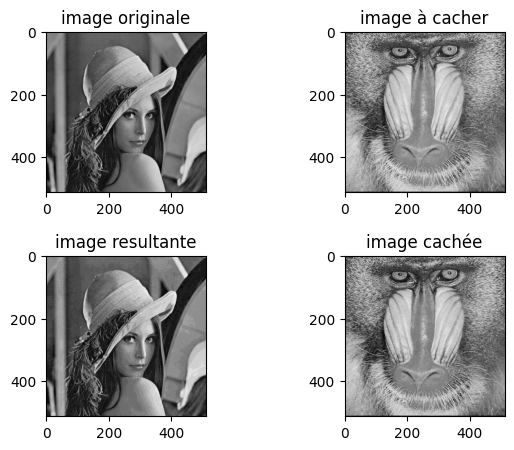

In [96]:
# Partie finale, utilisation des fonctions et affichage des résultats

# nous cachons Lena dans Mandrill
image_resultante = hide_Image(img_Lena, img_Mandrill)

# nous revelons l'image Mandrill cachée dans l'image resultante
img_cachee = reveler_Image_cachée(image_resultante)

# affichage de nos resultats
affichage(img_Lena, img_Mandrill, image_resultante, img_cachee)
